In [1]:
import pandas as pd

idx = []
for year in [2021, 2022, 2023, 2024]:
    for quarter in ['Q1', 'Q2', 'Q3', 'Q4']:
        idx.append(f"{year}_{quarter}")

df_list = [pd.read_csv(f'../data/processed/quarterly/{id}.csv') for id in idx]

/var/folders/sz/y6mbyrnd7d1g13bfc3t_0q5c0000gn/T/ipykernel_91940/379318859.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

cols = df_list[0].columns[3:]
scores_list = []
wcss_list = []

for df in df_list:
    cluster_range = range(2, 40)
    silhouette_scores = []
    wcss_scores = []

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(df[cols])
        score = silhouette_score(df[cols], cluster_labels)
        silhouette_scores.append(score)
        wcss_scores.append(kmeans.inertia_)
    scores_list.append(silhouette_scores)
    wcss_list.append(wcss_scores)


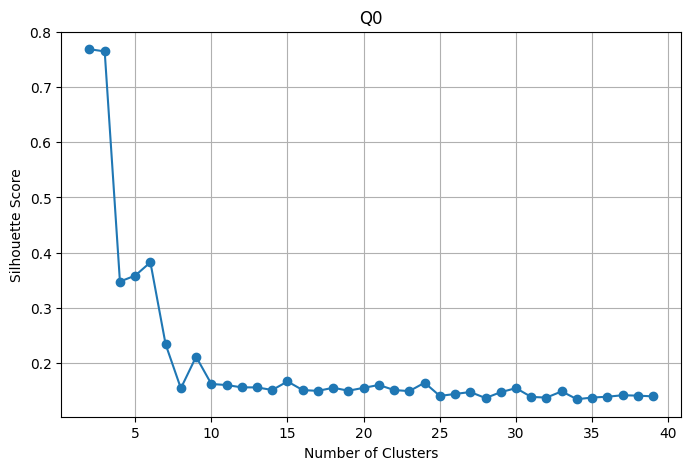

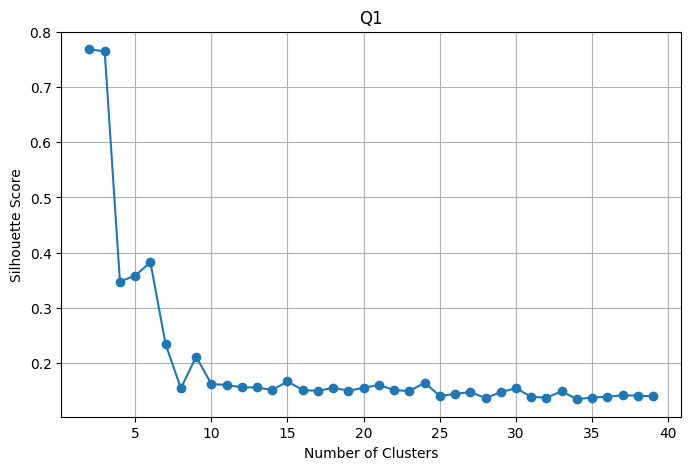

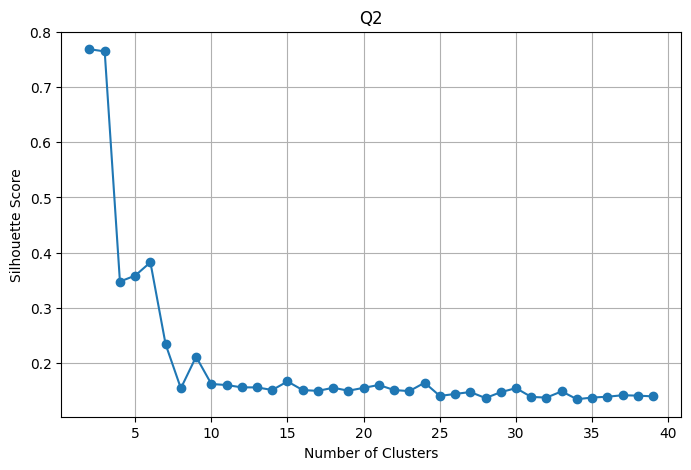

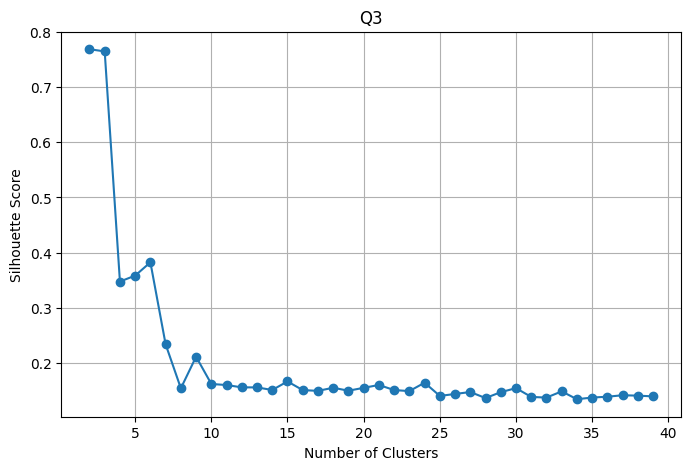

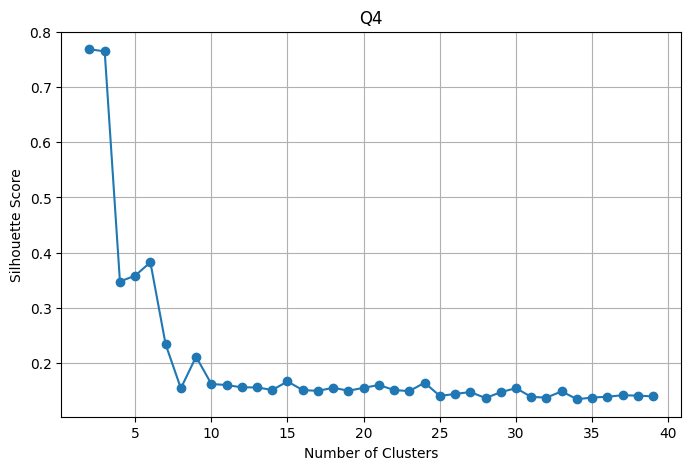

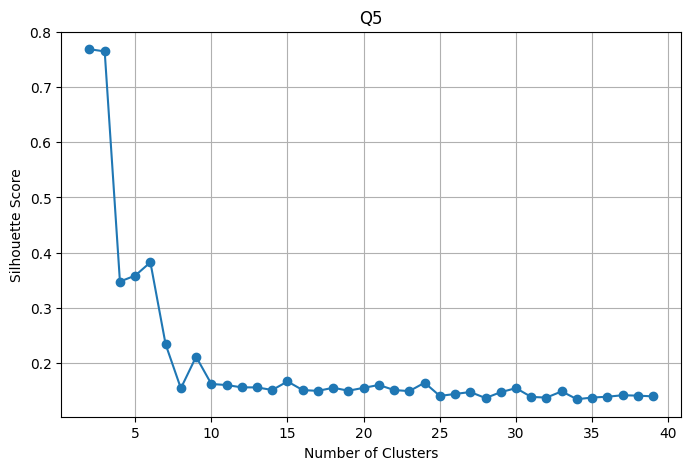

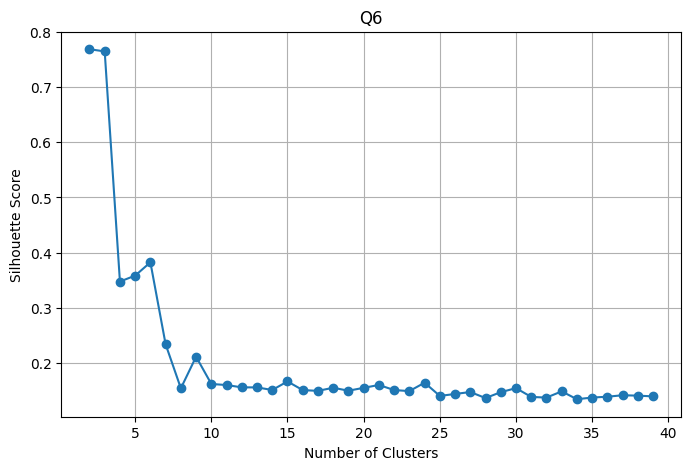

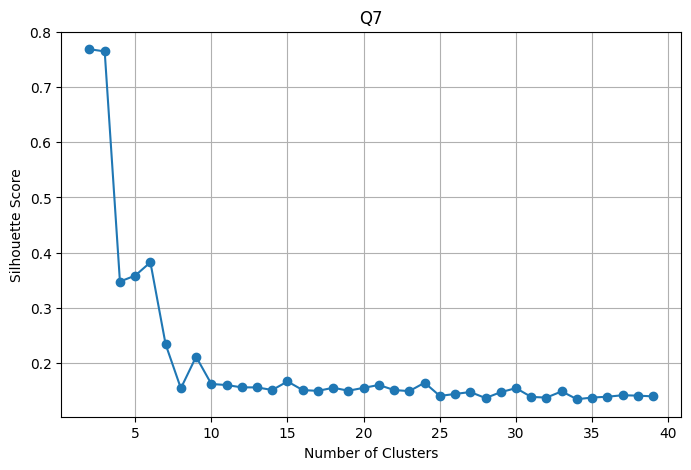

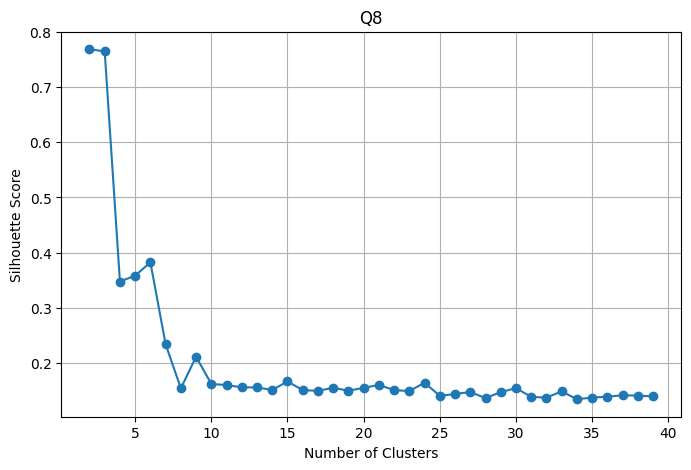

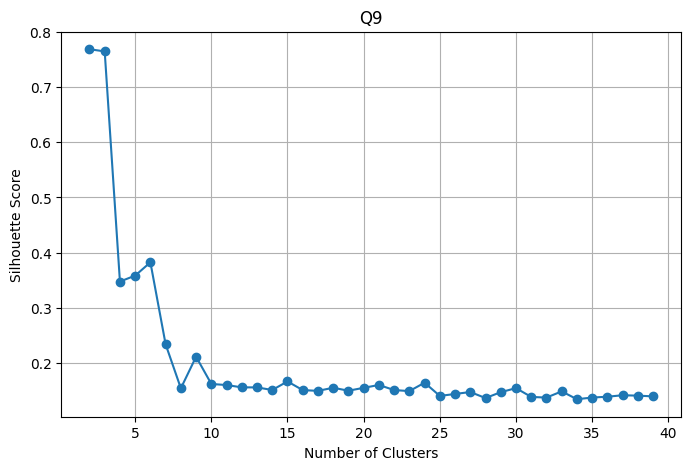

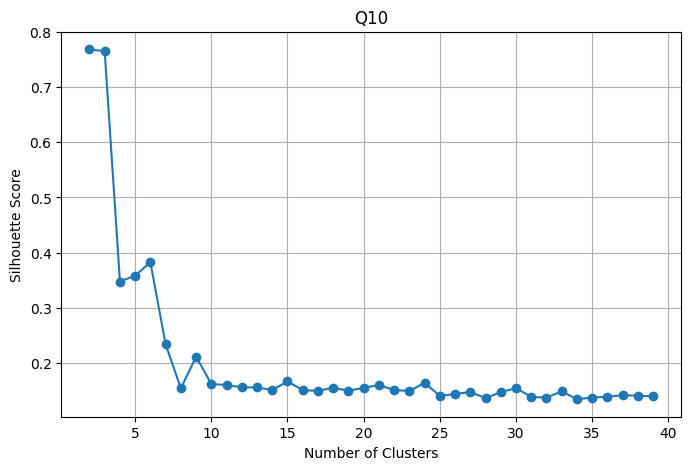

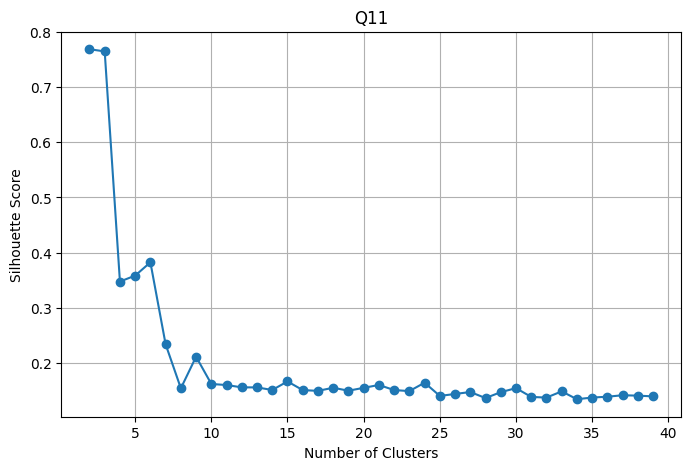

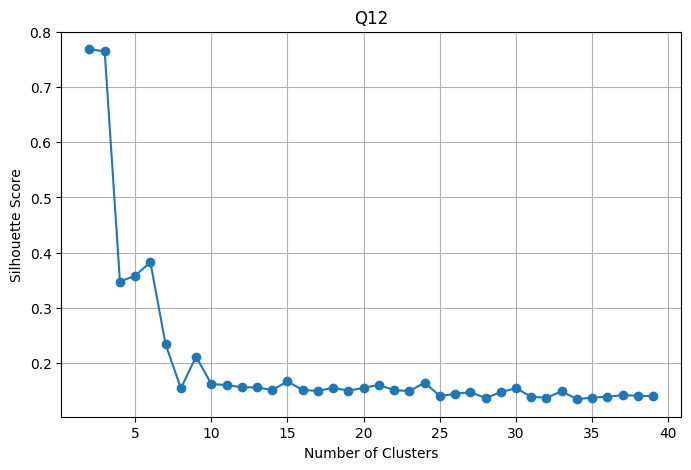

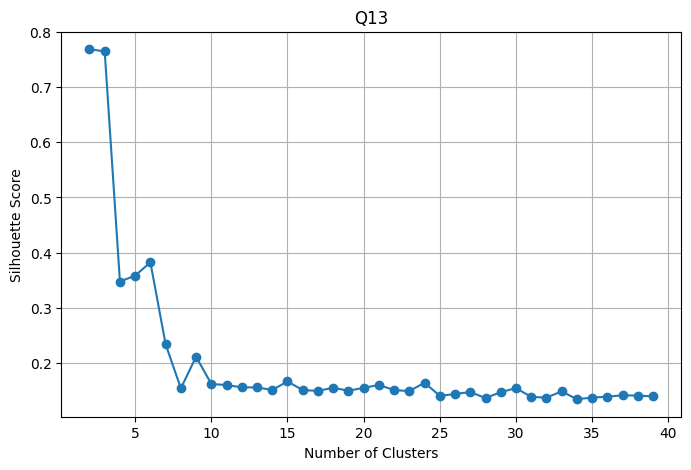

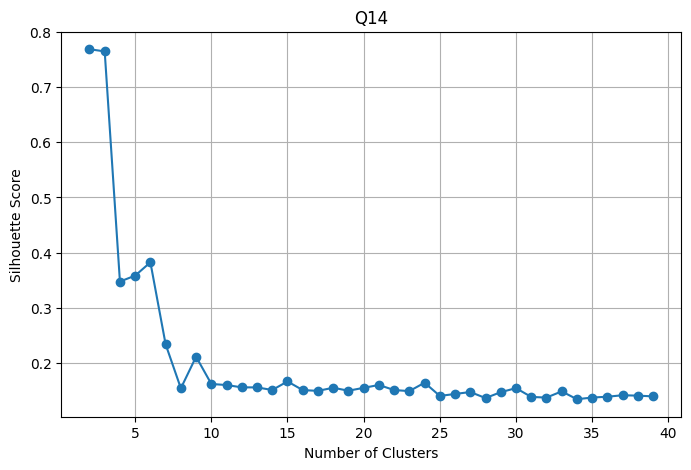

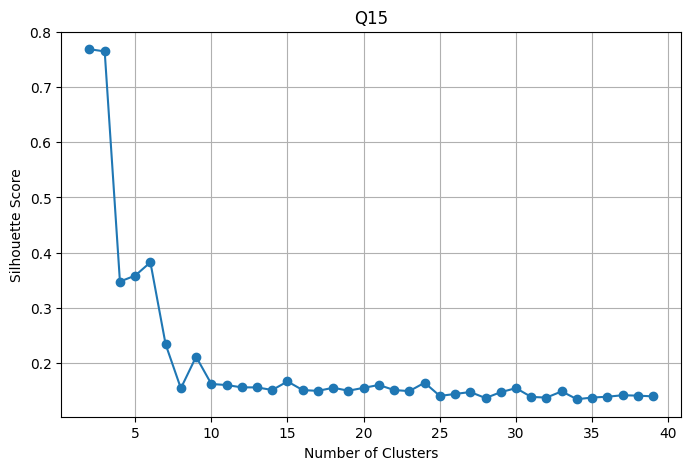

In [3]:
import matplotlib.pyplot as plt

for i, df in enumerate(scores_list):
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Q{i}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)
    plt.show()

In [5]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

common_symbols = set(df_list[0]['symbol'])
for df in df_list[1:]:
    common_symbols.intersection_update(set(df['symbol']))

# Filter each dataframe to include only common symbols
filtered_dfs = [df[df['symbol'].isin(common_symbols)] for df in df_list]

# Fit k-means models only on these filtered dataframes
kmeans_models = []
for df in filtered_dfs:
    kmeans = KMeans(n_clusters=15, random_state=42, n_init=10)
    kmeans.fit(df[cols])
    kmeans_models.append(kmeans)

# Now compare the clustering results using ARS, but only for common symbols
ars_scores = []
n_models = len(kmeans_models)

# Compare each model with every other model
for i in range(n_models):
    for j in range(i + 1, n_models):
        labels_i = kmeans_models[i].labels_
        labels_j = kmeans_models[j].labels_
        score = adjusted_rand_score(labels_i, labels_j)
        ars_scores.append((i, j, score))

# Print the ARS scores
for i, j, score in ars_scores:
    print(f"Adjusted Rand Score between model {i+1} and model {j+1}: {score}")


Adjusted Rand Score between model 1 and model 2: 0.3399105630364701
Adjusted Rand Score between model 1 and model 3: 0.2210576287578679
Adjusted Rand Score between model 1 and model 4: 0.23846497863698185
Adjusted Rand Score between model 1 and model 5: 0.2370426000489995
Adjusted Rand Score between model 1 and model 6: 0.25392161956075937
Adjusted Rand Score between model 1 and model 7: 0.20495784302164527
Adjusted Rand Score between model 1 and model 8: 0.1671184029949689
Adjusted Rand Score between model 1 and model 9: 0.24457486587701208
Adjusted Rand Score between model 1 and model 10: 0.2593077322006424
Adjusted Rand Score between model 1 and model 11: 0.2484357548691557
Adjusted Rand Score between model 1 and model 12: 0.22209452528995438
Adjusted Rand Score between model 1 and model 13: 0.27576309184286885
Adjusted Rand Score between model 1 and model 14: 0.19993256884258884
Adjusted Rand Score between model 1 and model 15: 0.17748474646036883
Adjusted Rand Score between model 

In [6]:
def get_ars(k):
    models = []
    for df in filtered_dfs:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df[cols])
        models.append(kmeans)

    ars_scores = []
    n_models = len(models)
    for i in range(n_models):
        for j in range(i + 1, n_models):
            labels_i = models[i].labels_
            labels_j = models[j].labels_
            score = adjusted_rand_score(labels_i, labels_j)
            ars_scores.append((i, j, score))
    
    return ars_scores

meta_ars_scores = []

for k in range(5,30):
    ars_scores = get_ars(k)
    meta_ars_scores.append((k, ars_scores))

In [7]:
for k, list in enumerate(meta_ars_scores):
    array = np.array(list[1]).T
    print(k)
    print(np.max(array[2]))
    print(np.mean(array[2]))

0
0.6589729874017973
0.31700035879270716
1
0.5697227435614876
0.2380107961317077
2
0.5630088348912602
0.26717070531584874
3
0.5025341542706151
0.2102273044588389
4
0.5145383931646516
0.18333633874035152
5
0.33545736720757946
0.17242538288114895
6
0.4124172271954694
0.18241224012617863
7
0.3773959297230889
0.1953929743949549
8
0.3167910690161667
0.2004718911925166
9
0.36150644117268577
0.1796567231987875
10
0.426457950133203
0.21116933755839945
11
0.35872416324436834
0.1882183363314634
12
0.4227844692973949
0.18545024719310202
13
0.3312260399852288
0.19432153598558682
14
0.37650592032129776
0.18505616054867577
15
0.29995305393478405
0.1747206785064179
16
0.304267334971915
0.1744466575078634
17
0.3584318806009487
0.17953109419603092
18
0.4008450622766491
0.186287709497957
19
0.35148764569218444
0.1889633870936675
20
0.28897899844446984
0.18762685341370602
21
0.30544746373703613
0.18349147342160954
22
0.3109492440304587
0.17844351282350424
23
0.2963219467984348
0.1771419009309391
24
0.295

In [ ]:
from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import os

common_symbols = set(df_list[0]['symbol'])
for df in df_list[1:]:
    common_symbols.intersection_update(set(df['symbol']))

filtered_dfs = [df[df['symbol'].isin(common_symbols)].sort_values('symbol') for df in df_list]

cols = filtered_dfs[0].columns[3:]  # Adjust this index based on your actual data structure

kmeans_models = []
for df in filtered_dfs:
    kmeans = KMeans(n_clusters=17, random_state=42, n_init=10)
    kmeans.fit(df[cols])
    kmeans_models.append(kmeans)

for i, (df, model) in enumerate(zip(filtered_dfs, kmeans_models)):
    df = df.copy()
    df['cluster'] = model.labels_
    df.to_csv(f'../data/processed/quarterly/cluster_labels/{idx[i]}_clusters.csv', index=False)

# Now compare the clustering results using ARS, but only for common symbols
ars_scores = []
n_models = len(kmeans_models)

# Compare each model with every other model
for i in range(n_models):
    for j in range(i + 1, n_models):
        labels_i = kmeans_models[i].labels_
        labels_j = kmeans_models[j].labels_
        score = adjusted_rand_score(labels_i, labels_j)
        ars_scores.append((i, j, score))

# Print the ARS scores
for i, j, score in ars_scores:
    print(f"Adjusted Rand Score between model {i+1} and model {j+1}: {score}")


Adjusted Rand Score between model 1 and model 2: 0.1411100754351059
Adjusted Rand Score between model 1 and model 3: 0.1354511392209646
Adjusted Rand Score between model 1 and model 4: 0.10127564576267169
Adjusted Rand Score between model 1 and model 5: 0.14063519835487448
Adjusted Rand Score between model 1 and model 6: 0.18557910199981476
Adjusted Rand Score between model 1 and model 7: 0.11077641330011452
Adjusted Rand Score between model 1 and model 8: 0.09292276839780376
Adjusted Rand Score between model 1 and model 9: 0.12372801063229719
Adjusted Rand Score between model 1 and model 10: 0.16388154581285075
Adjusted Rand Score between model 1 and model 11: 0.14043507152777263
Adjusted Rand Score between model 1 and model 12: 0.09483803701367456
Adjusted Rand Score between model 1 and model 13: 0.16316860146419304
Adjusted Rand Score between model 1 and model 14: 0.0957801453000586
Adjusted Rand Score between model 1 and model 15: 0.08534411087073335
Adjusted Rand Score between mod

In [ ]:
##NO FILTERING 


from sklearn.metrics import adjusted_rand_score
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import os

# Make sure the folder to save cluster labels exists
os.makedirs('../data/processed/quarterly/cluster_labels', exist_ok=True)

# Load your data (df_list and idx should already exist)
# df_list = [pd.read_csv(f'../data/processed/quarterly/{id}.csv') for id in idx]
# idx = ["2021_Q1", "2021_Q2", ..., "2024_Q4"]

cols = df_list[0].columns[3:]  # All columns starting from features

kmeans_models = []

# Cluster each quarter independently
for i, df in enumerate(df_list):
    df = df.copy()
    kmeans = KMeans(n_clusters=17, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(df[cols])
    kmeans_models.append(kmeans)

    # Save clustered data
    df.to_csv(f'../data/processed/quarterly/cluster_labels/{idx[i]}_clusters.csv', index=False)

# Optional: Compare clustering similarity with ARS for common stocks
common_symbols = set(df_list[0]['symbol'])
for df in df_list[1:]:
    common_symbols.intersection_update(set(df['symbol']))

filtered_dfs = [df[df['symbol'].isin(common_symbols)].sort_values('symbol') for df in df_list]

ars_scores = []
n_models = len(kmeans_models)

# Compare each model with every other model
for i in range(n_models):
    for j in range(i + 1, n_models):
        # Re-cluster filtered data just for ARS
        labels_i = KMeans(n_clusters=17, random_state=42, n_init=10).fit_predict(filtered_dfs[i][cols])
        labels_j = KMeans(n_clusters=17, random_state=42, n_init=10).fit_predict(filtered_dfs[j][cols])
        score = adjusted_rand_score(labels_i, labels_j)
        ars_scores.append((i, j, score))

# Print the ARS scores
for i, j, score in ars_scores:
    print(f"Adjusted Rand Score between model {i+1} and model {j+1}: {score:.4f}")


Adjusted Rand Score between model 1 and model 2: 0.1411
Adjusted Rand Score between model 1 and model 3: 0.1355
Adjusted Rand Score between model 1 and model 4: 0.1013
Adjusted Rand Score between model 1 and model 5: 0.1406
Adjusted Rand Score between model 1 and model 6: 0.1856
Adjusted Rand Score between model 1 and model 7: 0.1108
Adjusted Rand Score between model 1 and model 8: 0.0929
Adjusted Rand Score between model 1 and model 9: 0.1237
Adjusted Rand Score between model 1 and model 10: 0.1639
Adjusted Rand Score between model 1 and model 11: 0.1404
Adjusted Rand Score between model 1 and model 12: 0.0948
Adjusted Rand Score between model 1 and model 13: 0.1632
Adjusted Rand Score between model 1 and model 14: 0.0958
Adjusted Rand Score between model 1 and model 15: 0.0853
Adjusted Rand Score between model 1 and model 16: 0.1000
Adjusted Rand Score between model 2 and model 3: 0.3061
Adjusted Rand Score between model 2 and model 4: 0.2356
Adjusted Rand Score between model 2 and m